# Regressão Linear

O objetivo desse documento é promover o conhecimento de modelos de machine learning simples para pessoas que querem entrar na área e tem o inglês como barreira.

Abaixo temos uma análise extatística e exploratória de um dataset pequeno de uma empresa de telecomunicações. O objetivo é gerar insights bacanas e desenvolver ao fim um simples modelo de regressão linear para indicar qual a chance de um cliente da base de dados da empresa "dar churn", ou seja, deixar de ser cliente.

Vamos juntos!

Inicialmente, vamos às principais importações de bibliotecas padrões:

*Devido a uma incompatibilidade no github, a biblioteca plotly, que fornece gráficos interativos, não consegue ser renderizada. Por conta disso usaremos uma artimanha para transformar os gráficos em imagens png estéticas.

Para que isso funcione, devemos instalar a biblioteca kaleido com o comando: !pip install -U kaleido

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


A base de dados é de uma companhia de telecomunicações e cabe a esse trabalho desenvolver um modelo de regressão linear para que a empresa possa entender quais são as principais características que levam um usuário a dar "Churn", ou seja, deixar a base, e ter em mãos quais são os clientes que devem cancelar as assinaturas e com isso tomar as atitudes necessárias.

Por exemplo, se a empresa sabe que aquele determinado cliente tem possibilidade de dar churn a empresa pode:
- oferecer um novo desconto
- oferecer novos planos
- focar em um marketing estratégico
- entre outras táticas


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


A maioria dos dados está em formato de texto (object).

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


A função describe() nos fornece uma visão estatística de todas as variáveis numéricas de nosso dataset. Nesse caso, podemos ver:
- contagem (soma de todos os dados)
- média dos dados
- desvio padrão
- valor mínimo atingido
- primeiro quartil (25%)
- mediana (50%)
- terceiro quartil (75%)
- valor máximo

Com isso já podemos concluir que a variável SeniorCitizen é muito provavelmente binária, já que seu valor mínimo é zero e o máximo é 1. a vari[avel tenure indica a quanto tempo o cliente está na base (em meses) e por conta disso entendo que o valor mínimo igual a 0 deve ser equivalente a clientes recém chegados que ainda não completaram 1 mês. Por fim, a variável MonthlyCharges nos indica qual valor mensal pago pelos usuários. O valor mínimo e máximo estão dentro de um range super aceitável.

In [7]:
sums = df.groupby(['Churn']).sum()
sums

,SeniorCitizen,tenure,MonthlyCharges
Churn,,,
No,666,194387,316985.75
Yes,476,33603,139130.85


Como dá para ver, a maioria dos clientes que deixam a plataforma não são sêniores (pessoas de idade). Aliás, vamos observar quantas pessoas deixaram a base e seu percentual em relação ao total:

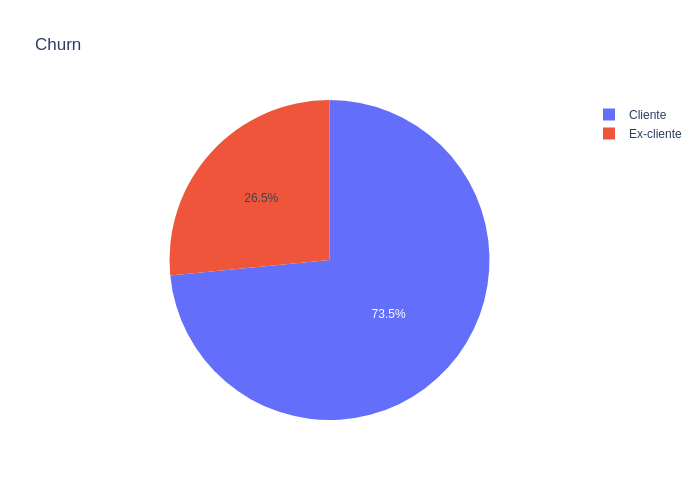

In [9]:
data =df['Churn'].value_counts()
fig = px.pie(data, values='Churn', names=['Cliente', 'Ex-cliente'], title='Churn')
fig.show(renderer="png")

Agora vamos entender a relação entre o tempo de assinatura e as pessoas que deixam de ser clientes. Primeiro, vamos ver há tempo as pessoas estão na base (em meses):

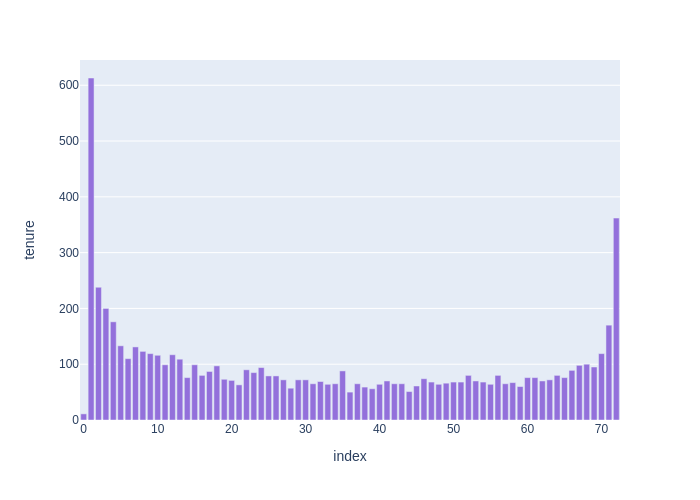

In [10]:
data = df['tenure'].value_counts()
fig = px.bar(data, x=data.index, y='tenure')
fig.update_traces(marker_color='mediumpurple')
fig.show(renderer="png")

Com esse gráfico podemos ver que a vasta maioria das pessoas está na base há pouco tempo (1 mês mais ou menos), mas que há um grupo relevante de clientes fiéis que se encontra há 72 meses como cliente. Legal.

Agora vamos ver quanto tempo ficaram na base as pessoas que a deixaram:

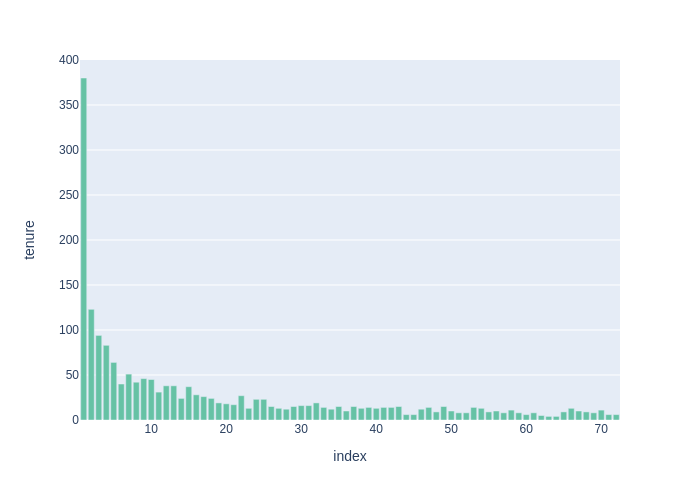

In [11]:
yes = df[df.Churn == 'Yes']
data = yes['tenure'].value_counts()
fig = px.bar(data, x=data.index, y='tenure')
fig.update_traces(marker_color='rgb(102, 194, 165)')
fig.show(renderer="png")

Pode-se obserevar que a maioria das pessoas que dá 'churn' é um cliente recente, que não chega a ficar 1 mês como cliente. Ainda é cedo para tirar conclusões, mas é uma informação bacana já. Quem sabe é o cliente que pegou 1 mês grátis (aquele período de teste) e acabou não gostando. Legal que já dá para ir formando algumas hipóteses. E como é de se esperar, conforme o cliente vai ficando, a chance dele sair vai diminuindo em linhas gerais.

Vamos observar a distribuição dos clientes que deram e não Churn em relação ao total pago com um boxplot:

Dá para reparar a importância de conhecer bem seus dados! onde estão armazenados, o que significa cada informação e onde é possível conseguir mais informação para formar suas hipóteses e sugestões.

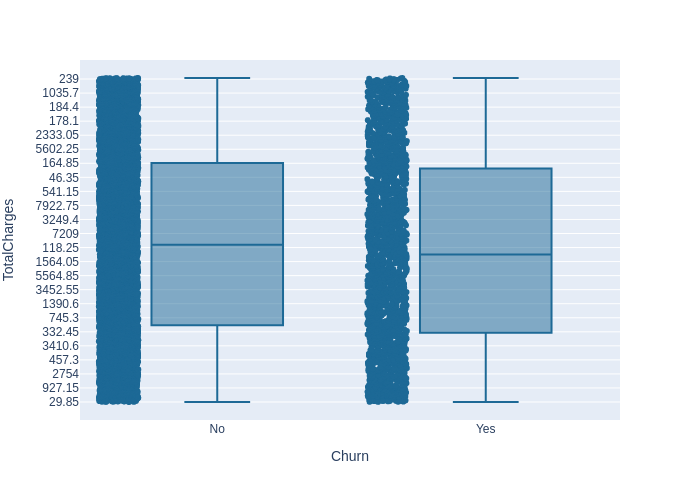

In [14]:
fig = px.box(df, x="Churn", y="TotalCharges", points="all")
fig.update_traces(marker_color='rgb(29, 105, 150)')
fig.show(renderer="png")
#fig.show()

Não consegui concluir muita coisa usando um boxplot. Talvez tenham jeitos melhores.

Vamos analisar o método de pagamento das pessoas que deixaram a base:

In [ ]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

A maioria das pessoas paga por meio desse "cheque eletrônico", seguido por cheque enviado por correio. Não esperava. Vamos ver agora só daqueles que deixaram a base.

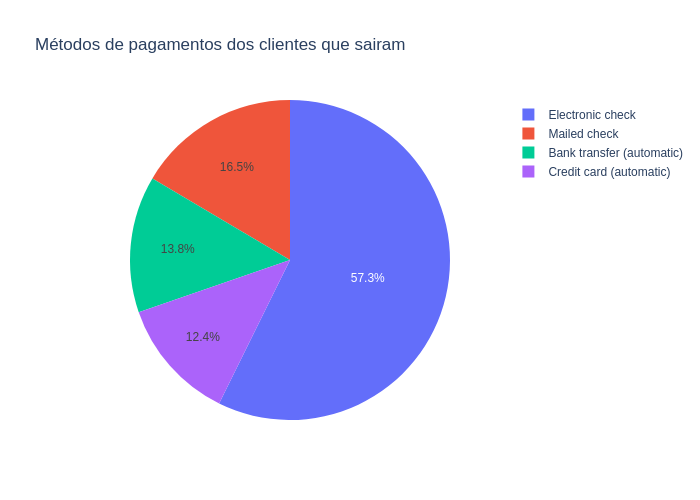

In [15]:
yes = df[df['Churn'] == 'Yes']
fig = px.pie(yes, values=yes['PaymentMethod'].value_counts(), names=['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'],
             title='Métodos de pagamentos dos clientes que sairam')

fig.show(renderer="png")


Interessante, a princípio, imgainei que fosse mais fácil cancelar a assinatura quando se paga de maneira eletrônica, mas pelo visto pessoas que pagam de maneira automática não são a maioria dos que deixam a base. 

Aqui devemos prestar atenção também porque, somando todos os clientes - que saíram ou não - os métodos Eletronic Check e Mailed Check são os principais. Nesses casos, não podemos tirar conclusões muita conclusivas com relação ao método de pagamento porque esses são os métodos mais comuns tanto para quem fica quanto para quem sai, ou seja, não exprime um comportamento exclusivo daqueles clientes que saem, mas sim um comportamento de todos os clientes que se reflete também nos que saíram.

In [16]:
means = df[['tenure','MonthlyCharges', 'Churn', 'TotalCharges']].groupby(['Churn']).mean()
means

,tenure,MonthlyCharges
Churn,,
No,37.569965,61.265124
Yes,17.979133,74.441332


Além disso, na média, as pessoas que deram Churn são clientes há menos tempo e  pagam mais mensalmente.  Agora vamos analisar melhor os dados para ver quais features valem a pena serem convertidas para número para que sirvam para as análises.

In [ ]:
df.value_counts()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines     InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn
0002-ORFBO  Female  0              Yes      Yes         9       Yes           No                DSL              No                   Yes                  No                   Yes                  Yes                  No                   One year        Yes               Mailed check               65.60           593.3         No       1
6616-AALSR  Female  0              Yes      Yes         65      Yes           Yes               Fiber optic      Yes                  No                   Yes                  No                   Yes                  Yes                  Two year        Yes               Credit card (automatic)    104.30          6725.3 

Ok, a maioria dos dados parece ser relevante e fácil de se converter em números com one-hot-enconding. Além disso a coluna TotalCharges apesar de ser numérica está em formato de texto, possivelmente por uso de vírgula no lugar de ponto. Vamos resolver esses pontos. A, e nossa variável a ser buscada é o Churn.

In [ ]:
df["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

Na verdade a coluna tem 11 espaços em branco. Vamos colocar 0 em seu lugar.

Isso não é o correto, mas para nossos fins vamos assumir que valores nulos equivalem a clientes recentes que ainda não pagaram a primeira parcela do plano. O certo seria investigar e entender se é um dado faltante por conta de não ter sido preenchido ou outro problema e a partir disso buscar o melhor jeito de preenchê-lo (zero, média, mediana...) ou até mesmo deletar essas 11 linhas. Mas atenção, essas decisões são importantes e deletar as linhas com problemas deve ser muito ponderado, uma vez que quando se tem uma base de dados pequena, deletar linhas pode comprometer ainda mais a amostra.

In [17]:
df["TotalCharges"].replace({" ": 0}, inplace=True)

In [18]:
df["TotalCharges"].value_counts()

0         11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [19]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

Aqui passamos agora a variável TotalCharges para numérica, uma vez que não tem mais espaços vazios e já está pronta. A questão da vírgula e ponto não foi um problema.

Para o one-hot-enconding vamos usar outro dataframe, não é boa prática fazer alterações nos dados orginais e eu inclusive já fiz uma.

In [20]:
df2 = df
df2.drop('customerID', axis=1, inplace=True)
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Tirei a informação do ID do usuário porque isso não é relevante para nossas análises.

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Vamos ao modelo.

Primeiro devemos criar nosso modelo com o one-hot-enconding para usarmos todas informações possíveis. Vai ficar grandão.

In [22]:
df2 = pd.get_dummies(df2, columns= ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',\
                                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',\
                                    'Contract', 'PaperlessBilling', 'PaymentMethod'])
df2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,No,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,Yes,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,No,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,Yes,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,No,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,No,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,No,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,Yes,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


Ok, antes de ver a correlação entre as variáveis vamos transformar a variável Churn em numérica:

In [28]:
df2["Churn"].replace({"Yes": 1, "No": 0}, inplace=True)
df2['Churn'] = df2['Churn'].astype('float64')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   MonthlyCharges                           7043 non-null   float64
 3   TotalCharges                             7043 non-null   float64
 4   Churn                                    7043 non-null   float64
 5   gender_Female                            7043 non-null   uint8  
 6   gender_Male                              7043 non-null   uint8  
 7   Partner_No                               7043 non-null   uint8  
 8   Partner_Yes                              7043 non-null   uint8  
 9   Dependents_No                            7043 non-null   uint8  
 10  Dependents_Yes                           7043 no

Esse tipo de dado "uint8" acontece quando fazemos o one-hot-encondig usando a "get_dummies". É quando é binário.

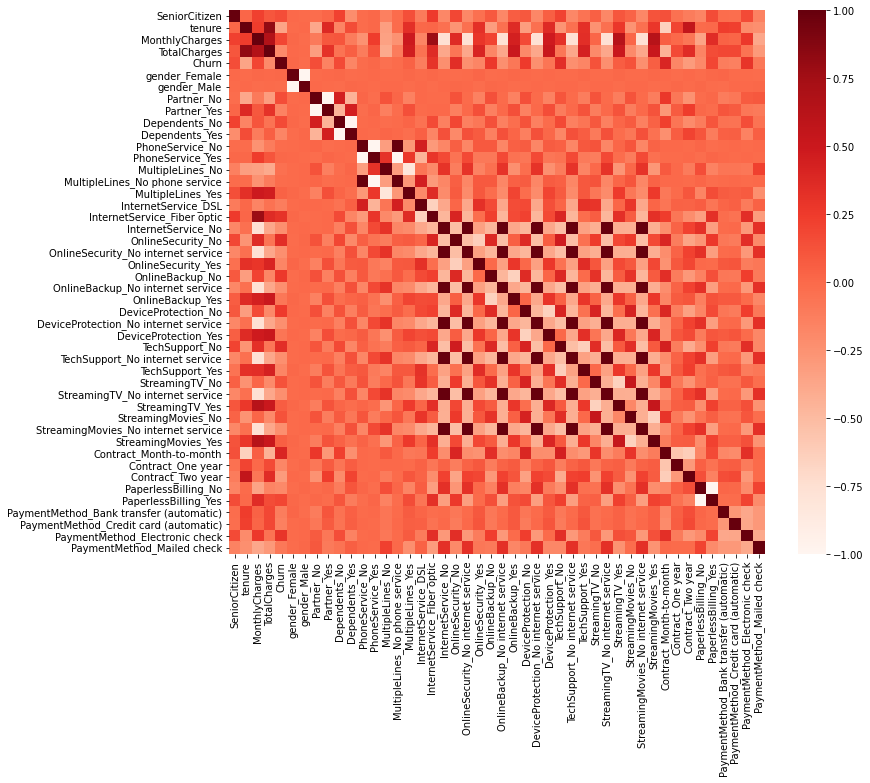

In [29]:
plt.figure(figsize=(12,10))
cor2= df2.corr()
sns.heatmap(cor2, annot=False, cmap=plt.cm.Reds)
plt.show()

Ok, ficou zero visual. Vamos ver de outra forma:

In [30]:
cor2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016567,0.220173,0.103006,0.150889,0.001874,-0.001874,-0.016479,0.016479,0.211185,...,0.120176,0.138360,-0.046262,-0.117000,-0.156530,0.156530,-0.016159,-0.024135,0.171718,-0.153477
tenure,0.016567,1.000000,0.247900,0.826178,-0.352229,-0.005106,0.005106,-0.379697,0.379697,-0.159712,...,0.286111,-0.645561,0.202570,0.558533,-0.006152,0.006152,0.243510,0.233006,-0.208363,-0.233852
MonthlyCharges,0.220173,0.247900,1.000000,0.651174,0.193356,0.014569,-0.014569,-0.096848,0.096848,0.113890,...,0.627429,0.060165,0.004904,-0.074681,-0.352150,0.352150,0.042812,0.030550,0.271625,-0.377437
TotalCharges,0.103006,0.826178,0.651174,1.000000,-0.198324,0.000080,-0.000080,-0.317504,0.317504,-0.062078,...,0.520122,-0.444255,0.170814,0.354481,-0.158574,0.158574,0.185987,0.182915,-0.059246,-0.295758
Churn,0.150889,-0.352229,0.193356,-0.198324,1.000000,0.008612,-0.008612,0.150448,-0.150448,0.164221,...,0.061382,0.405103,-0.177820,-0.302253,-0.191825,0.191825,-0.117937,-0.134302,0.301919,-0.091683
gender_Female,0.001874,-0.005106,0.014569,0.000080,0.008612,1.000000,-1.000000,-0.001808,0.001808,0.010517,...,0.010487,0.003386,-0.008026,0.003695,-0.011754,0.011754,0.016024,-0.001215,-0.000752,-0.013744
gender_Male,-0.001874,0.005106,-0.014569,-0.000080,-0.008612,-1.000000,1.000000,0.001808,-0.001808,-0.010517,...,-0.010487,-0.003386,0.008026,-0.003695,0.011754,-0.011754,-0.016024,0.001215,0.000752,0.013744
Partner_No,-0.016479,-0.379697,-0.096848,-0.317504,0.150448,-0.001808,0.001808,1.000000,-1.000000,0.452676,...,-0.117412,0.280865,-0.082783,-0.248091,-0.014877,0.014877,-0.110706,-0.082029,0.083852,0.095125
Partner_Yes,0.016479,0.379697,0.096848,0.317504,-0.150448,0.001808,-0.001808,-1.000000,1.000000,-0.452676,...,0.117412,-0.280865,0.082783,0.248091,0.014877,-0.014877,0.110706,0.082029,-0.083852,-0.095125
Dependents_No,0.211185,-0.159712,0.113890,-0.062078,0.164221,0.010517,-0.010517,0.452676,-0.452676,1.000000,...,0.039741,0.231720,-0.068368,-0.204613,-0.111377,0.111377,-0.052021,-0.060267,0.150642,-0.059071


Tem muita variável. Vamos transformar todas (as proporcionais e inversamente proporcionais) as variáveis em diretamente proporcionais (com valores absolutos) e ver as realmente significativas:

Para isso vamos ver quais são as variáveis que tem uma correlação de pearson >0.2 em relação a nossa variável target:

In [31]:
cor_target2 = abs(cor2["Churn"])
relevant_features = cor_target2[cor_target2>0.2]
relevant_features

tenure                                  0.352229
Churn                                   1.000000
InternetService_Fiber optic             0.308020
InternetService_No                      0.227890
OnlineSecurity_No                       0.342637
OnlineSecurity_No internet service      0.227890
OnlineBackup_No                         0.268005
OnlineBackup_No internet service        0.227890
DeviceProtection_No                     0.252481
DeviceProtection_No internet service    0.227890
TechSupport_No                          0.337281
TechSupport_No internet service         0.227890
StreamingTV_No internet service         0.227890
StreamingMovies_No internet service     0.227890
Contract_Month-to-month                 0.405103
Contract_Two year                       0.302253
PaymentMethod_Electronic check          0.301919
Name: Churn, dtype: float64

Legal, aparentemente o mais importante é o a variável tenure que mostra há quanto tempo em que esse usuário é cliente. Faz sentido.

E apenas para sabermos, com relação ao R de pearson:

Entre 0 – 0.2 Correlação muito fraca

Entre 0.2 – 0.4 Fraca

Entre 0.4 – 0.6 Moderada

Entre 0.6 – 0.8 Forte

Entre 0.8 – 1.0 Muito forte

Ou seja, nenhuma correlação que temos é muito forte, mas tudo bem, vamos seguir. Ainda vou fazer um projeto apenas de Feature Engineering, que é justamente mexer no dataset - fazer operações com as colunas, adicionar novos dados... - para aumentar essa correlação.

Vamos ver um gráfico agora bem completinho que relaciona para nós os pagamentos totais e mensais e há quanto tempo o cliente está na base.

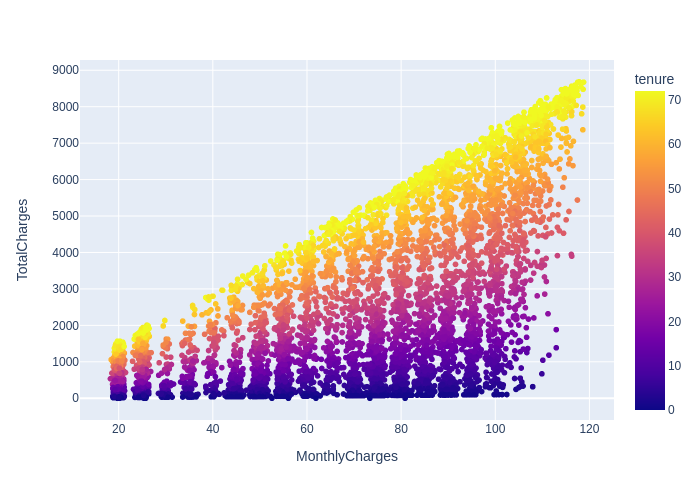

In [32]:
fig = px.scatter(df, x="MonthlyCharges", y="TotalCharges", color="tenure",
                 )
fig.show(renderer="png")

Esse gráfico para complexo, mas na verdade só confirma várias coisas lógicas. Em amarelo vemos que as pessoas que mais pagam são aquelas que estão há mais tempo na base e portanto tem contas totais mais altas - mesmo pagando pouco por mês - inclusive, ninguém pagou mais que as pessoas que estão há mais ou menos 70 meses na base. Além disso, podemos ver que quem paga mais mensalmente já pagou mais no total também, independente de há quanto tempo está na base. Usuários novos pagaram pouco mensalmente e no total também.

Vamos ao modelo, parte mais simples:

Importante destacar que a regressão linear não é o algoritmo ideal para esse tipo de problema, mas vamos lá mesmo assim ( esse é um problema de classificação (sim (1) ou não (0)) e regressão linear é geralmente usada para prever variáveis numéricas contínuas (preço de um carro, por exemplo).

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [34]:
features = df2.drop('Churn', axis=1)
target = df2['Churn']
features

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


Vamos dividir o modelo entre treino (30%) e teste (70%) e eliminar o fator randômico (random_state=42).

In [35]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [36]:
modelo = LinearRegression().fit(features_train, target_train)

yhat_ml_test = modelo.predict(features_test)
yhat_ml_train = modelo.predict(features_train)
r2_train = r2_score(target_train, yhat_ml_train)
r2_test = r2_score(target_test, yhat_ml_test)

print('Resultados:')

print('-'*20)

print('Intercepto: {}'.format(modelo.intercept_))
print("Coeficiente: {}".format(modelo.coef_))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(target_train, yhat_ml_train))))
print('R2: {}'.format(r2_train))

Resultados:
--------------------
Intercepto: 0.5837206317881982
Coeficiente: [ 4.52272031e-02 -1.78074560e-03 -4.87492663e-03 -4.26314324e-05
  6.53634077e-03 -6.53634077e-03 -4.29125221e-04  4.29125221e-04
  8.66808601e-03 -8.66808601e-03 -3.12842056e-02  3.12842056e-02
 -2.00621349e-02 -3.12842056e-02  5.13463405e-02 -1.21499928e-01
  1.69137675e-01 -4.76377466e-02  4.08701025e-02 -4.76377466e-02
  6.76764405e-03  2.39848253e-02 -4.76377466e-02  2.36529213e-02
  8.99502441e-03 -4.76377466e-02  3.86427222e-02  3.13983241e-02
 -4.76377466e-02  1.62394225e-02 -1.43010997e-02 -4.76377466e-02
  6.19388463e-02 -3.32233812e-02 -4.76377466e-02  8.08611278e-02
  6.31656659e-02 -4.21913376e-02 -2.09743283e-02 -2.08339495e-02
  2.08339495e-02 -1.56400721e-02 -1.83232587e-02  5.48401577e-02
 -2.08768269e-02]
RMSE: 0.3752705036562726
R2: 0.2728759403312515


O RMSE (root mean squared error): é a medida que calcula "a raiz quadrática média" dos erros entre valores observados (reais) e predições (hipóteses). É a raiz quadrada do MSE. Calma lá:

O erro quadrático médio (MSE — do inglês Mean Squared Error) é uma métrica que calcula a média de diferença entre o valor predito com o real. Por ser elevado ao quadrado, se penaliza valores que sejam muito diferentes entre o previsto e o real. Portanto, quanto maior é o valor de MSE, significa que o modelo não performou bem em relação as previsões.

Apesar de sua ideia poderosa, a métrica MSE apresenta um problema de interpretabilidade. Por haver a elevação ao quadrado, a unidade fica distorcida, em outras palavras, se a unidade medida for metros (m), o resultado será em m². Por isso que uma adaptação da MSE é a RMSE:

A raiz do erro quadrático médio (RMSE — do inglês, Root Mean Squared Error) é basicamente o mesmo cálculo de MSE, contendo ainda a mesma ideia de penalização entre diferenças grandes do valor previsto e o real. Porém, para lidar com o problema da diferença entre unidades, é aplicada a raiz quadrática. Assim a unidade fica na mesma escala que o dado original, resultando em uma melhor interpretabilidade do resultado da métrica.

Valores mais baixos de RMSE indicam melhor ajuste. O RMSE é uma boa medida da precisão com que o modelo prevê a resposta. É o critério mais importante para ajuste se o objetivo principal do modelo for a previsão. Ou seja, 0.37 não é excelente, mas tá ok considerando tudo.

Já o R² nos informa que percentual é eliminado do erro de previsão na variável y quando usamos a regressão de mínimos quadrados sobre a variável x. Como resultado, também é chamado de coeficiente de determinação.

Um R-quadrado alto ou baixo não é necessariamente bom ou ruim, pois não transmite a confiabilidade do modelo nem se você escolheu a regressão correta. Você pode obter um R-quadrado baixo para um bom modelo ou um R-quadrado alto para um modelo mal ajustado e vice-versa.

In [37]:
print('Resultados Teste:')
print('-'*20)
print('RMSE: {}'.format(np.sqrt(mean_squared_error(target_test, yhat_ml_test)))) 
print('R2: {}'.format(r2_test))

Resultados Teste:
--------------------
RMSE: 0.37045447029205686
R2: 0.306385503197111


Performou muito parecido nos dados de teste, não parece haver um overfitting, até porque não performou muito bem nos dados de treini.

Outro algoritmo aqui poderia aumentar sem dúvidas a acurácia do modelo.